In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split
# K折交叉验证
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
# 分层K折交叉验证
from sklearn.model_selection import StratifiedKFold
# 分层随机交叉验证
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import GroupShuffleSplit

np.random.seed(27149)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 5

In [36]:
# data
n_points = 100
percentiles_classes = [0.1, 0.3, 0.6]

X = np.random.randn(100, 10)
y = np.hstack([[i] * int(100 * perc) for i, perc in enumerate(percentiles_classes)])
groups = np.hstack([[i] * 10 for i in np.arange(10)])
print(X.shape)
print(y)
print(groups)

(100, 10)
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9]


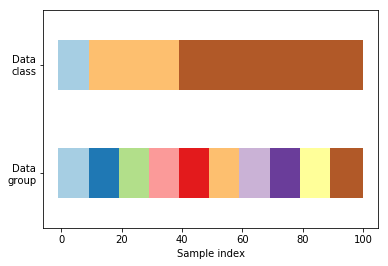

In [37]:
def visualize_groups(classes, groups, name):
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)), [0.5] * len(groups), c = groups, 
               marker = '_', lw = 50, cmap = cmap_data)
    ax.scatter(range(len(groups)), [3.5] * len(groups), c = classes, 
               marker = '_', lw = 50, cmap = cmap_data)
    ax.set(ylim = [-1, 5], 
           yticks = [0.5, 3.5], 
           yticklabels = ['Data\ngroup', 'Data\nclass'],
           xlabel = 'Sample index')

visualize_groups(y, groups, 'no_groups')

In [44]:
def plot_cv_indices(cv, X, y, groups, ax, n_splits, lw = 10):
    for i, (train, validate) in enumerate(cv.split(X = X, y = y, groups = groups)):
        indices = np.array([np.nan] * len(X))
        indices[validate] = 1
        indices[train] = 0
        print("Index: ", i)
        print("Validation Index: ", validate)
        print("Train Index: ", train)
        print("Indices: ", indices)
        print("=" * 80)
        ax.scatter(range(len(indices)), [i + 0.5] * len(indices), c = indices, 
                   marker = '_', lw = lw, cmap = cmap_cv, vmin = -0.2, vmax = 1.20)
        
    ax.scatter(range(len(X)), [i + 1.5] * len(X), c = y,
               marker = '_', lw = lw, cmap = cmap_data)
    ax.scatter(range(len(X)), [i + 2.5] * len(X), c = groups, 
               marker = '_', lw = lw, cmap = cmap_data)
    
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks = np.arange(n_splits + 2) + 0.5, 
           yticklabels = yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim = [n_splits + 2.2, -0.2],
           xlim = [0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize = 15)
    ax.legend([Patch(color = cmap_cv(.8)), Patch(color = cmap_cv(.02))], 
              ['Testing set', 'Training set'], 
              loc = (1.02, .8))
    return ax

Index:  0
Validation Index:  [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
Indices:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Index:  1
Validation Index:  [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 

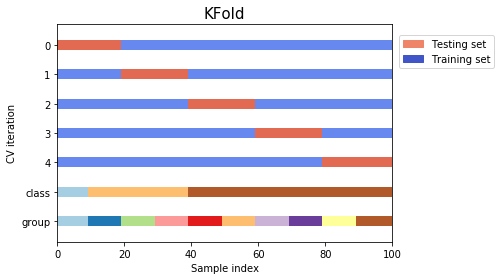

In [45]:
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

Index:  0
Validation Index:  [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
Indices:  [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Index:  1
Validation Index:  [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 

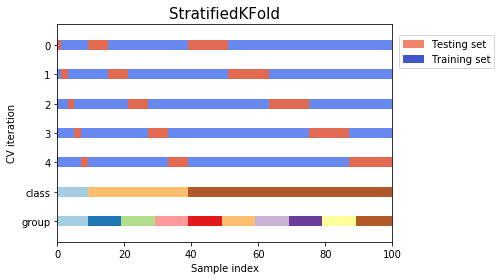

In [46]:
fig, ax = plt.subplots()
cv = StratifiedKFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

Index:  0
Validation Index:  [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
Indices:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0.]
Index:  1
Validation Index:  [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 

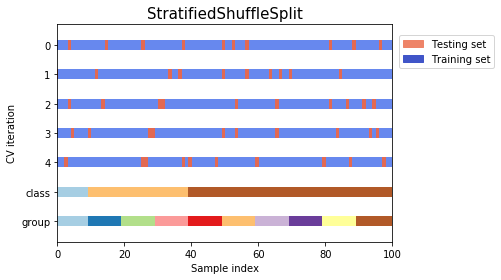

In [47]:
fig, ax = plt.subplots()
cv = StratifiedShuffleSplit(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

Index:  0
Validation Index:  [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
Indices:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0.]
Index:  1
Validation Index:  [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 

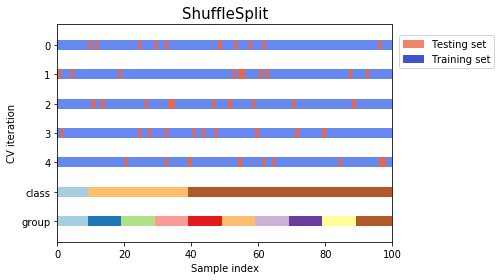

In [48]:
fig, ax = plt.subplots()
cv = ShuffleSplit(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

Index:  0
Validation Index:  [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
Indices:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Index:  1
Validation Index:  [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 

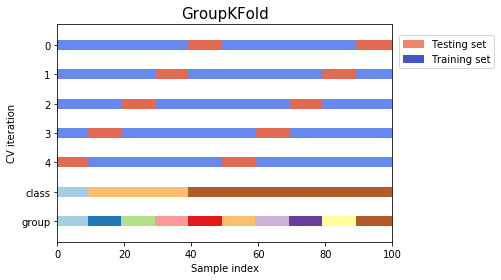

In [49]:
fig, ax = plt.subplots()
cv = GroupKFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

Index:  0
Validation Index:  [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
Indices:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Index:  1
Validation Index:  [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 

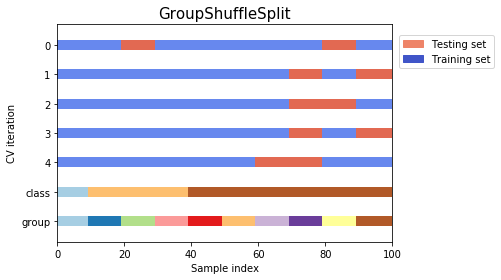

In [50]:
fig, ax = plt.subplots()
cv = GroupShuffleSplit(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);

Index:  0
Validation Index:  [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
Indices:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
Index:  1
Validation Index:  [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Train Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 

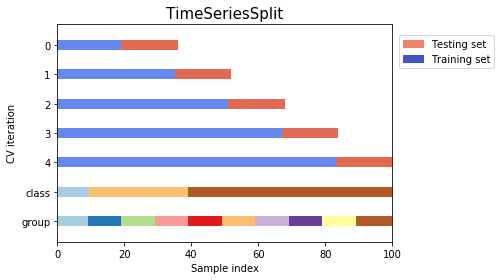

In [51]:
fig, ax = plt.subplots()
cv = TimeSeriesSplit(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits);